# House Prices EDA - Advanced Regression Techniques

Exploratory Data Analysis for the Kaggle House Prices competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Set figure size and DPI
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

In [2]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

Training data shape: (1460, 81)
Test data shape: (1459, 80)


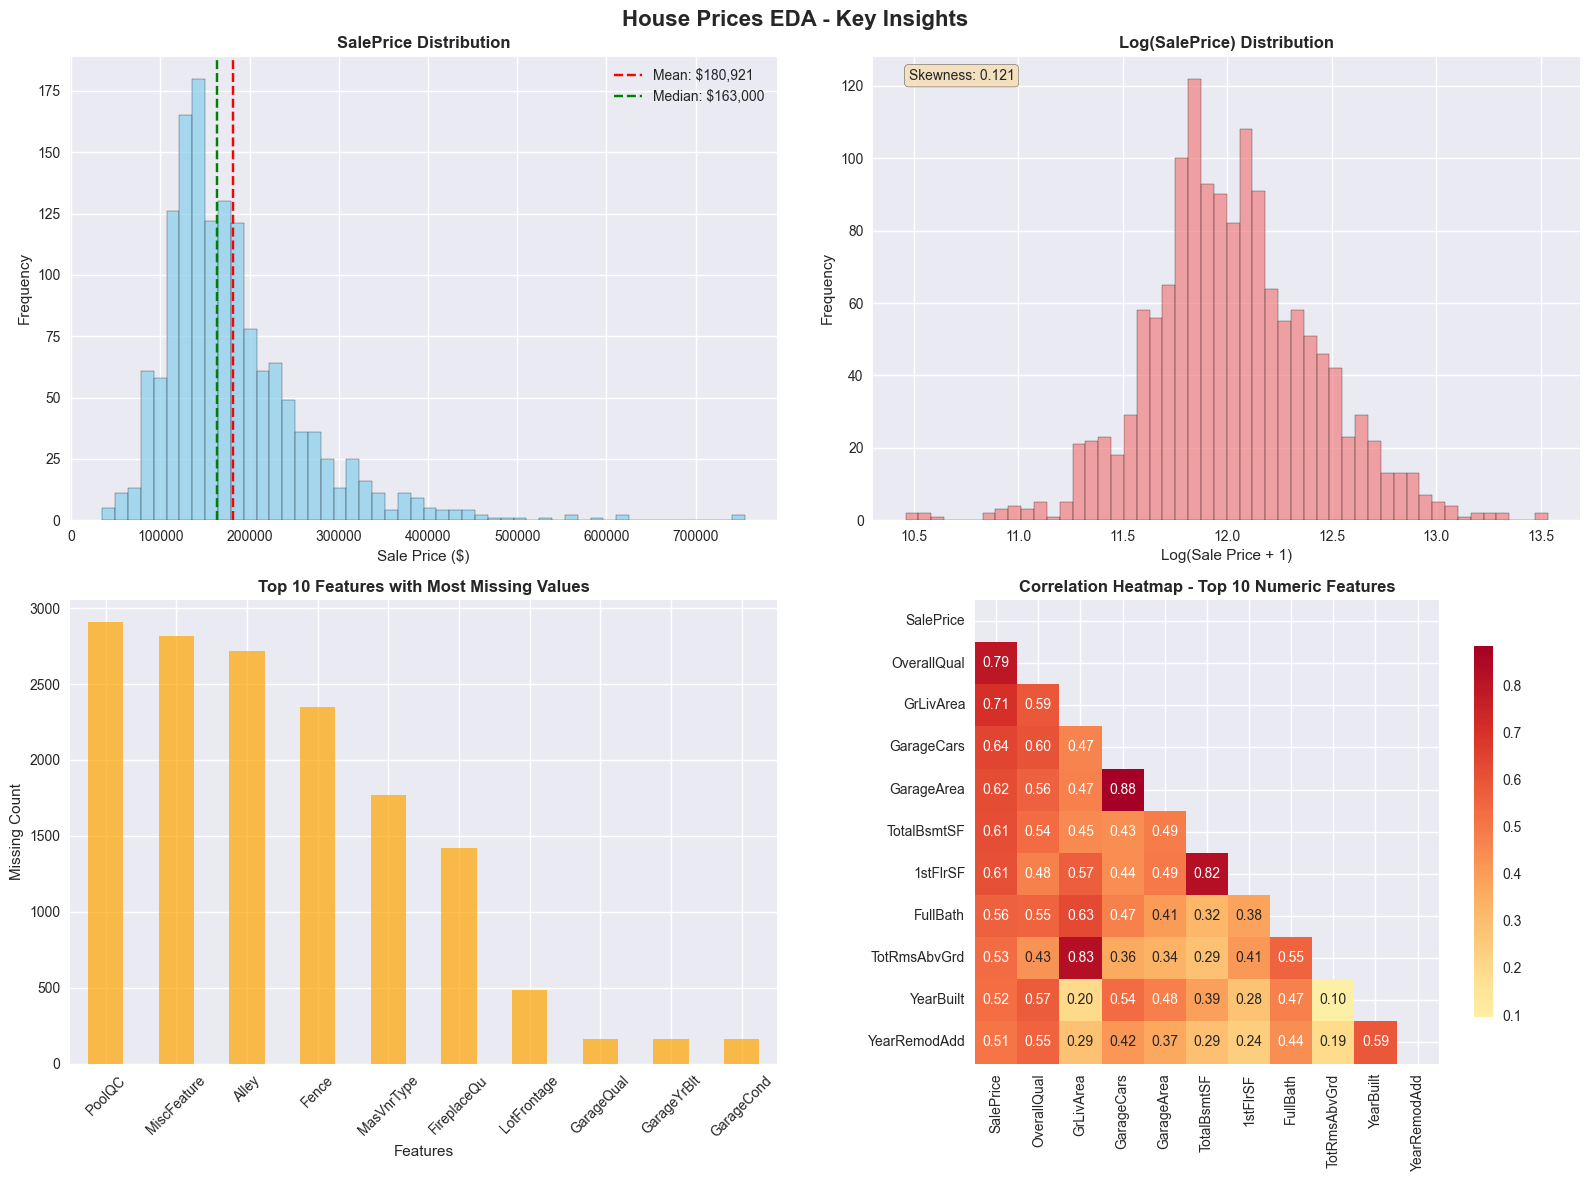

In [3]:
# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('House Prices EDA - Key Insights', fontsize=16, fontweight='bold')

# 1. SalePrice distribution histogram
axes[0, 0].hist(train_df['SalePrice'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('SalePrice Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Sale Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].ticklabel_format(style='plain', axis='x')

# Add statistics text
mean_price = train_df['SalePrice'].mean()
median_price = train_df['SalePrice'].median()
axes[0, 0].axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:,.0f}')
axes[0, 0].axvline(median_price, color='green', linestyle='--', label=f'Median: ${median_price:,.0f}')
axes[0, 0].legend()

# 2. SalePrice log distribution
log_prices = np.log1p(train_df['SalePrice'])
axes[0, 1].hist(log_prices, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Log(SalePrice) Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Log(Sale Price + 1)')
axes[0, 1].set_ylabel('Frequency')

# Add normality test results
skewness = stats.skew(log_prices)
axes[0, 1].text(0.05, 0.95, f'Skewness: {skewness:.3f}', transform=axes[0, 1].transAxes, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Top 10 features with most missing values
# Combine train and test for missing value analysis
all_data = pd.concat([train_df.drop('SalePrice', axis=1), test_df], axis=0, ignore_index=True)
missing_data = all_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)[:10]

missing_data.plot(kind='bar', ax=axes[1, 0], color='orange', alpha=0.7)
axes[1, 0].set_title('Top 10 Features with Most Missing Values', fontweight='bold')
axes[1, 0].set_xlabel('Features')
axes[1, 0].set_ylabel('Missing Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Correlation heatmap of top 10 numeric features most correlated with SalePrice
numeric_features = train_df.select_dtypes(include=[np.number])
corr_with_target = numeric_features.corr()['SalePrice'].abs().sort_values(ascending=False)
top_corr_features = corr_with_target.head(11).index.tolist()  # Top 10 + SalePrice

corr_matrix = numeric_features[top_corr_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8}, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap - Top 10 Numeric Features', fontweight='bold')

plt.tight_layout()
plt.show()

Number of outliers in GrLivArea: 31
Outlier threshold: 2748 sq ft

Outlier details:
        Id  GrLivArea  SalePrice
1298  1299       5642     160000
523    524       4676     184750
1182  1183       4476     745000
691    692       4316     755000
1169  1170       3627     625000
185    186       3608     475000
304    305       3493     295000
1268  1269       3447     381000
635    636       3395     200000
769    770       3279     538000
1353  1354       3238     410000
496    497       3228     430000
118    119       3222     320000
608    609       3194     359100
798    799       3140     485000
197    198       3112     235000
1173  1174       3086     200500
1031  1032       3082     197000
324    325       2978     242000
58      59       2945     438780
1024  1025       2898     287000
1175  1176       2872     285000
961    962       2872     272000
1046  1047       2868     556581
1142  1143       2828     424870
803    804       2822     582933
1312  1313       2810    

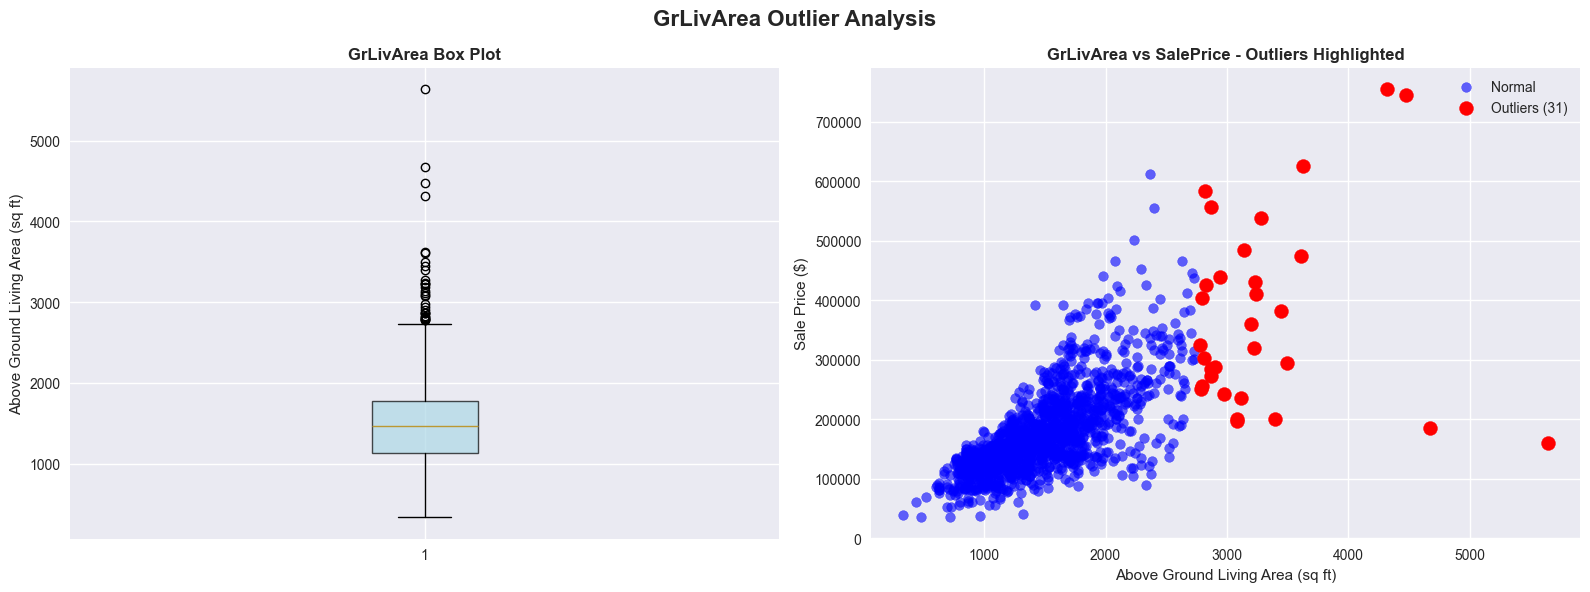

In [4]:
# Identify and visualize outliers in GrLivArea
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('GrLivArea Outlier Analysis', fontsize=16, fontweight='bold')

# Box plot to identify outliers
axes[0].boxplot(train_df['GrLivArea'], patch_artist=True, 
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[0].set_title('GrLivArea Box Plot', fontweight='bold')
axes[0].set_ylabel('Above Ground Living Area (sq ft)')

# Calculate outlier threshold using IQR method
Q1 = train_df['GrLivArea'].quantile(0.25)
Q3 = train_df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = train_df[(train_df['GrLivArea'] < lower_bound) | (train_df['GrLivArea'] > upper_bound)]

# Scatter plot showing outliers
axes[1].scatter(train_df['GrLivArea'], train_df['SalePrice'], alpha=0.6, color='blue', label='Normal')
axes[1].scatter(outliers['GrLivArea'], outliers['SalePrice'], color='red', s=100, label=f'Outliers ({len(outliers)})')
axes[1].set_title('GrLivArea vs SalePrice - Outliers Highlighted', fontweight='bold')
axes[1].set_xlabel('Above Ground Living Area (sq ft)')
axes[1].set_ylabel('Sale Price ($)')
axes[1].legend()
axes[1].ticklabel_format(style='plain', axis='y')

print(f"Number of outliers in GrLivArea: {len(outliers)}")
print(f"Outlier threshold: {upper_bound:.0f} sq ft")
print("\nOutlier details:")
print(outliers[['Id', 'GrLivArea', 'SalePrice']].sort_values('GrLivArea', ascending=False))

plt.tight_layout()
plt.show()

Top 3 features most correlated with SalePrice: ['OverallQual', 'GrLivArea', 'GarageCars']
Correlation values: [0.7909816  0.70862448 0.6404092 ]


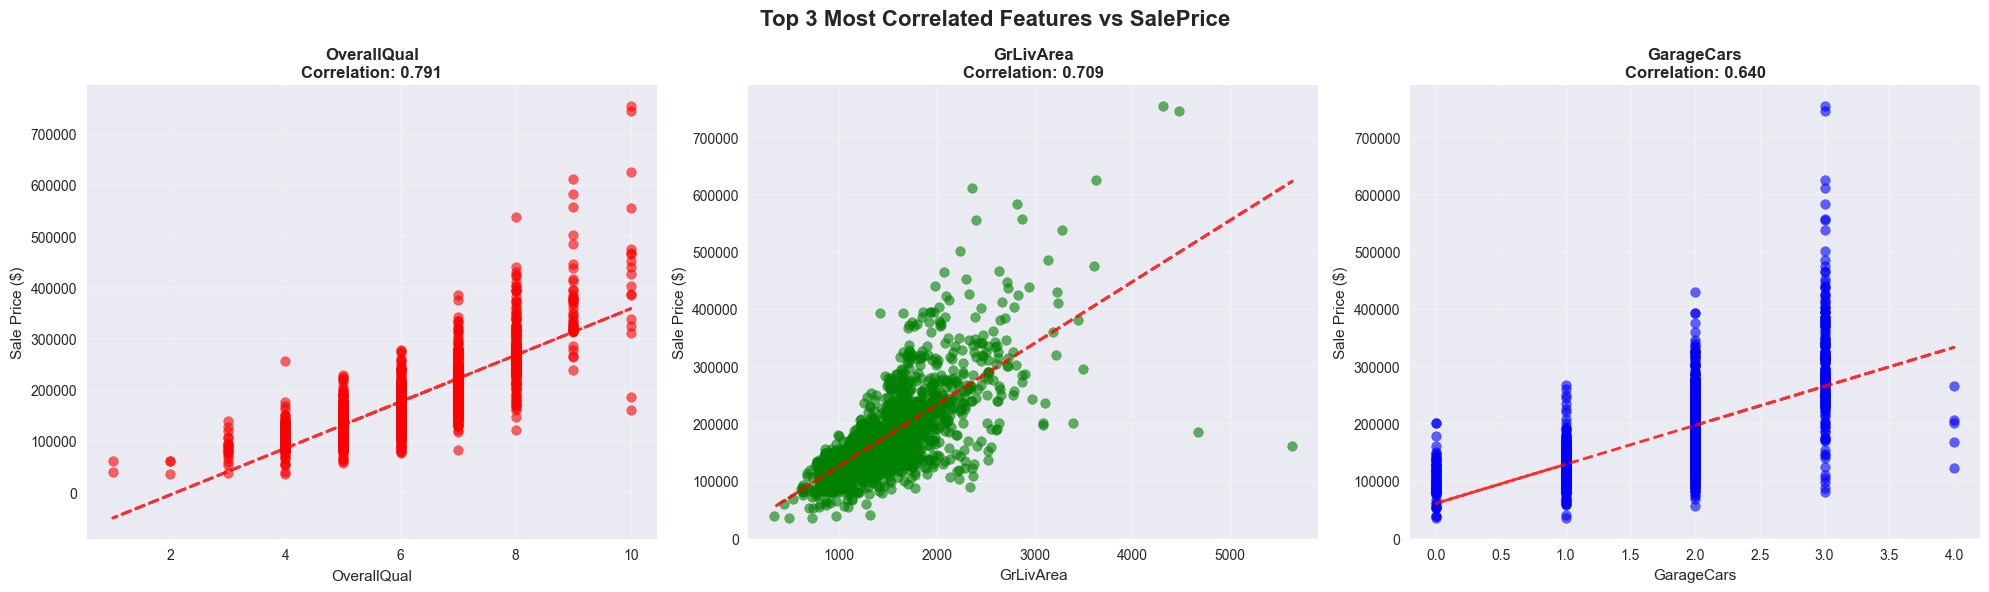

In [5]:
# Get top 3 most correlated numeric features with SalePrice (excluding SalePrice itself)
top_3_features = corr_with_target.drop('SalePrice').head(3).index.tolist()
print(f"Top 3 features most correlated with SalePrice: {top_3_features}")
print(f"Correlation values: {corr_with_target[top_3_features].values}")

# Create scatter plots for the 3 most correlated features
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Top 3 Most Correlated Features vs SalePrice', fontsize=16, fontweight='bold')

colors = ['red', 'green', 'blue']

for i, feature in enumerate(top_3_features):
    axes[i].scatter(train_df[feature], train_df['SalePrice'], alpha=0.6, color=colors[i])
    
    # Add trend line
    z = np.polyfit(train_df[feature], train_df['SalePrice'], 1)
    p = np.poly1d(z)
    axes[i].plot(train_df[feature], p(train_df[feature]), "r--", alpha=0.8, linewidth=2)
    
    # Correlation coefficient
    corr_coef = train_df[feature].corr(train_df['SalePrice'])
    
    axes[i].set_title(f'{feature}\nCorrelation: {corr_coef:.3f}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Sale Price ($)')
    axes[i].ticklabel_format(style='plain', axis='y')
    
    # Add grid for better readability
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# Summary statistics and insights
print("=== EDA SUMMARY ===")
print(f"\n1. Dataset Overview:")
print(f"   - Training samples: {train_df.shape[0]:,}")
print(f"   - Features: {train_df.shape[1]-1}")
print(f"   - Test samples: {test_df.shape[0]:,}")

print(f"\n2. SalePrice Distribution:")
print(f"   - Mean: ${train_df['SalePrice'].mean():,.0f}")
print(f"   - Median: ${train_df['SalePrice'].median():,.0f}")
print(f"   - Std: ${train_df['SalePrice'].std():,.0f}")
print(f"   - Skewness: {stats.skew(train_df['SalePrice']):.3f}")
print(f"   - Log-transformed skewness: {stats.skew(np.log1p(train_df['SalePrice'])):.3f}")

print(f"\n3. Missing Data:")
print(f"   - Features with missing data: {len(missing_data)}")
print(f"   - Most missing: {missing_data.index[0]} ({missing_data.iloc[0]} values)")

print(f"\n4. Top Correlations with SalePrice:")
for i, feature in enumerate(top_3_features):
    corr_val = corr_with_target[feature]
    print(f"   {i+1}. {feature}: {corr_val:.3f}")

print(f"\n5. GrLivArea Outliers:")
print(f"   - Number of outliers: {len(outliers)}")
print(f"   - Largest outlier: {outliers['GrLivArea'].max():,.0f} sq ft")
print(f"   - These may represent luxury/commercial properties")

=== EDA SUMMARY ===

1. Dataset Overview:
   - Training samples: 1,460
   - Features: 80
   - Test samples: 1,459

2. SalePrice Distribution:
   - Mean: $180,921
   - Median: $163,000
   - Std: $79,443
   - Skewness: 1.881
   - Log-transformed skewness: 0.121

3. Missing Data:
   - Features with missing data: 10
   - Most missing: PoolQC (2909 values)

4. Top Correlations with SalePrice:
   1. OverallQual: 0.791
   2. GrLivArea: 0.709
   3. GarageCars: 0.640

5. GrLivArea Outliers:
   - Number of outliers: 31
   - Largest outlier: 5,642 sq ft
   - These may represent luxury/commercial properties
